In [61]:
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns

import matplotlib.pyplot as plt

df = pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
# Get the list and data types for all of the columns
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [63]:
# To make changes create new subset of the original dataset
titanic_clean_dt = df

# Fill the NaN and blanks to 0 and convert the Age type to integer 
titanic_clean_dt['Age'] = titanic_clean_dt['Age'].fillna(0).astype(int)

# Delete the Cabin column from the Dataset as not required
titanic_clean_dt.drop('Cabin',axis=1, inplace=True)

In [64]:
#Check how many missing or NaN values are in the whole dataset 

total_missing_values = titanic_clean_dt.isnull().sum()
total_missing_values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [66]:
# Filter the dataset to find records where 'Embarked' is NaN
embarked_nan_records = df[df['Embarked'].isnull()]
embarked_nan_records

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80.0,NaN


We can see that the both passangers survived and Traveled on the same ticket.
This leads to conclusion that the where they Embarked are not significant
therefore the data will be makred as U for unknown place of embarking. 

In [67]:
# Fill missing values in 'Embarked' with 'U' for Unknown
titanic_clean_dt['Embarked'] = titanic_clean_dt['Embarked'].fillna('U')

# Check if all data has been clean
total_missing_values = titanic_clean_dt.isnull().sum()
total_missing_values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Question 1:
What is the most important factor in determining survival of the Titanic incident?

I have choose the Correlation Analysis as the best method as we have mostly numeric values
We need to convert categorical variables to numerical and visualize it with the heatmap

Prior this process we need to also drop the name and ticket id 
as this correlation cannot include non integers

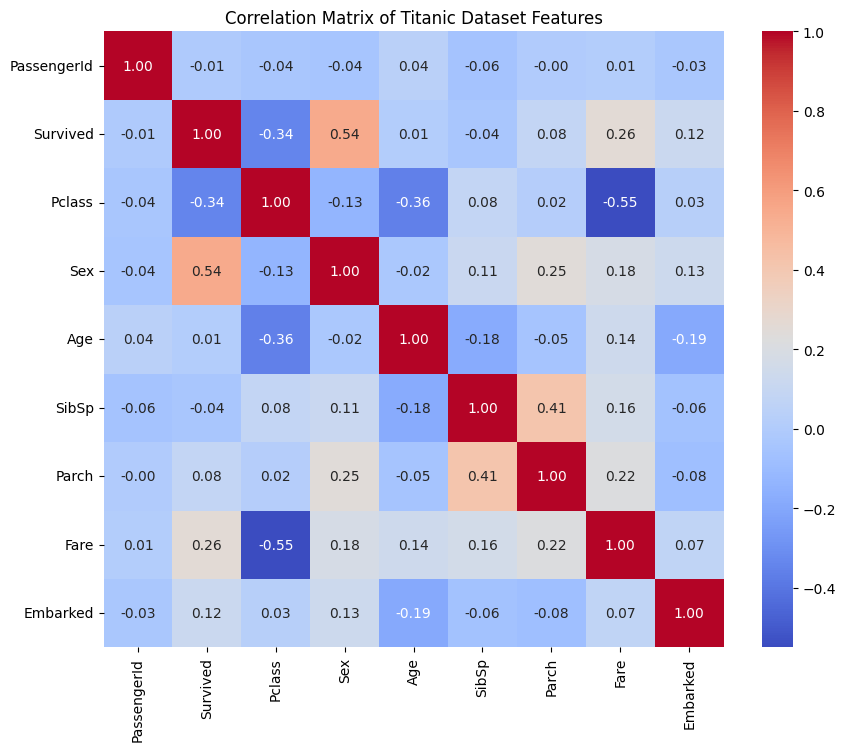

Survived       1.000000
Sex            0.543351
Fare           0.257307
Embarked       0.118026
Parch          0.081629
Age            0.010508
PassengerId   -0.005007
SibSp         -0.035322
Pclass        -0.338481
Name: Survived, dtype: float64

In [68]:
# Drop name column and ticket 
titanic_clean_dt.drop('Name',axis=1, inplace=True)
titanic_clean_dt.drop('Ticket',axis=1, inplace=True)

# Convert categorical variables to numerical for correlation purposes
titanic_clean_dt['Sex'] = titanic_clean_dt['Sex'].map({'female': 1, 'male': 0})
titanic_clean_dt['Embarked'] = titanic_clean_dt['Embarked'].map({'S': 0, 'C': 1, 'Q': 2, 'U': 3})

# Compute correlation matrix for the dataset
correlation_matrix = titanic_clean_dt.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Titanic Dataset Features')
plt.show()

# Focusing on the 'Survived' column correlations
survival_correlations = correlation_matrix['Survived'].sort_values(ascending=False)
survival_correlations


Two of the most significant positive factor is Sex for survival and negative is Class.
Which means that the as the Male = 0 and Female = 1 with the increase of the value
chance of survival increases.
Similar but oposit classification representation is for Class with the decrease of the value
chance of survival increases.

To confirm this please find the following visualisation of Sex and Visual based on survival rate

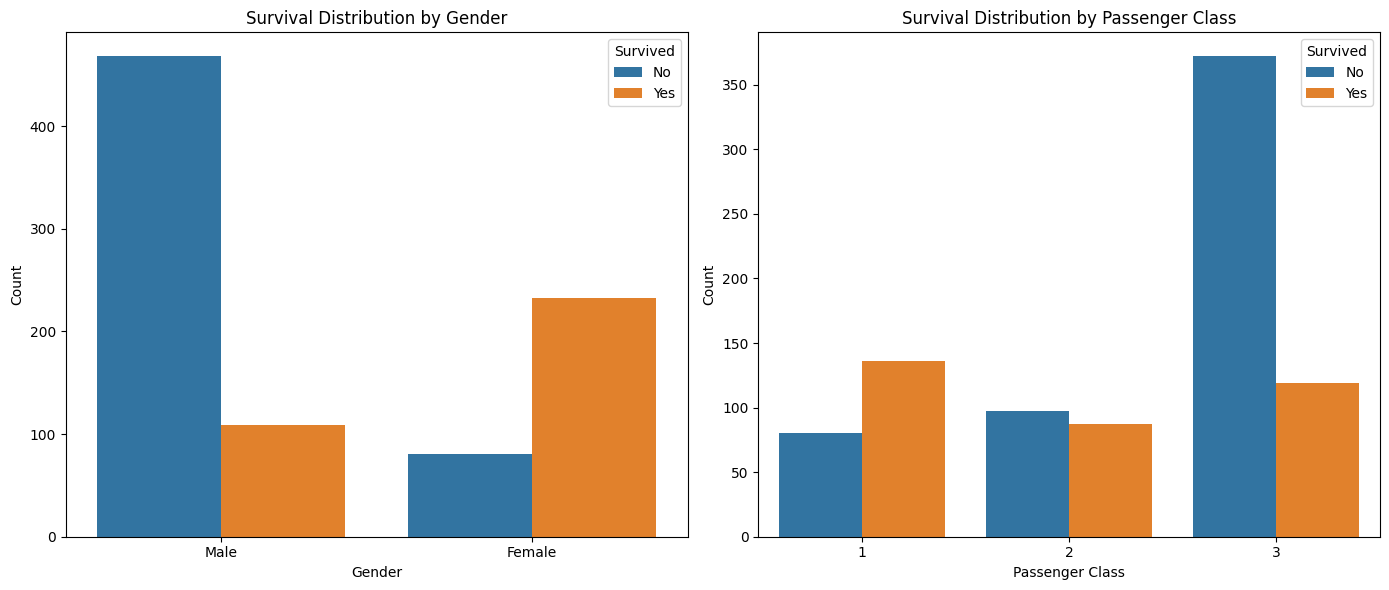

In [69]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Plot 1: Survival by Gender
plt.subplot(1, 2, 1)
sns.countplot(x='Sex', hue='Survived', data=titanic_clean_dt.replace({'Sex': {0: 'Male', 1: 'Female'}}))
plt.title('Survival Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

# Plot 2: Survival by Passenger Class
plt.subplot(1, 2, 2)
sns.countplot(x='Pclass', hue='Survived', data=titanic_clean_dt)
plt.title('Survival Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

Question 2:

In the movie, the upper-class passengers were given preference on lifeboats.
Does this show in the data?

As showed above on the Plot 2 this we can see that the higher class the higher survival rate

Question 3:

“Women and children first”. Was this the case?

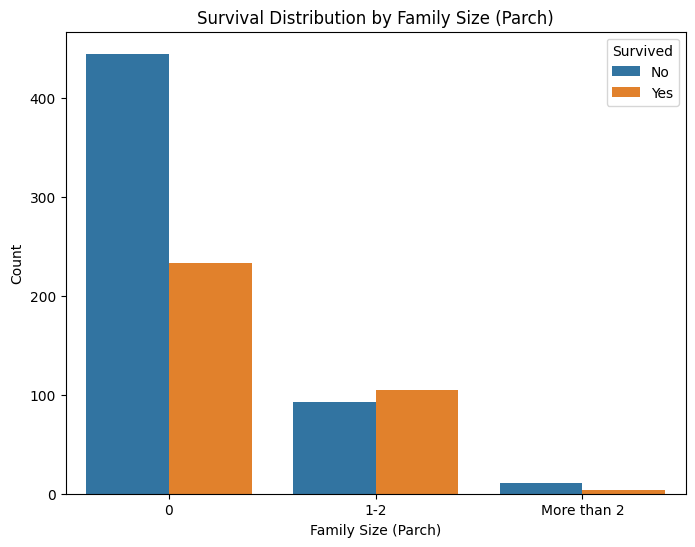

In [70]:
# Create a new column 'FamilySize' based on the 'Parch' data
titanic_clean_dt['FamilySize'] = titanic_clean_dt['Parch'].apply(lambda x: '0' if x == 0 else '1-2' if x <= 2 else 'More than 2')

# Visualize Survival by Family Size (based on Parch)
plt.figure(figsize=(8, 6))
sns.countplot(x='FamilySize', hue='Survived', data=titanic_clean_dt)
plt.title('Survival Distribution by Family Size (Parch)')
plt.xlabel('Family Size (Parch)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

It can be seen on the chart above that the small families had a the highest Survival rate as also we can see in previous chart that Woman had a higher rate of Surviving so yes that was the case.

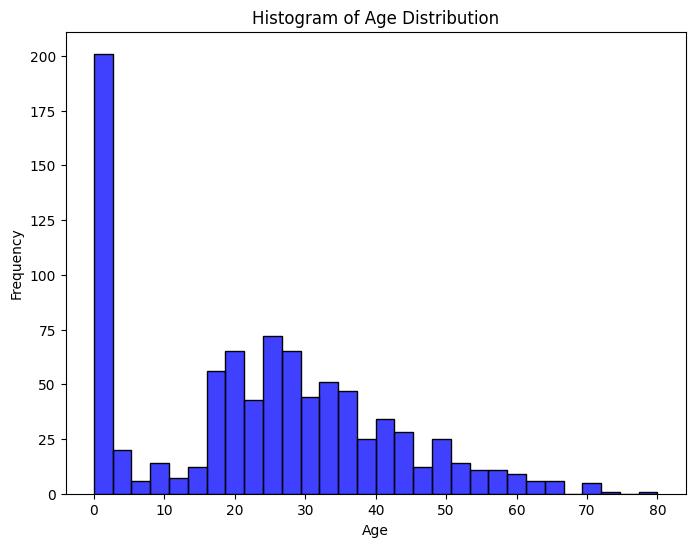

In [71]:
plt.figure(figsize=(8, 6))
sns.histplot(titanic_clean_dt['Age'], bins=30, kde=False, color='blue')
plt.title('Histogram of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

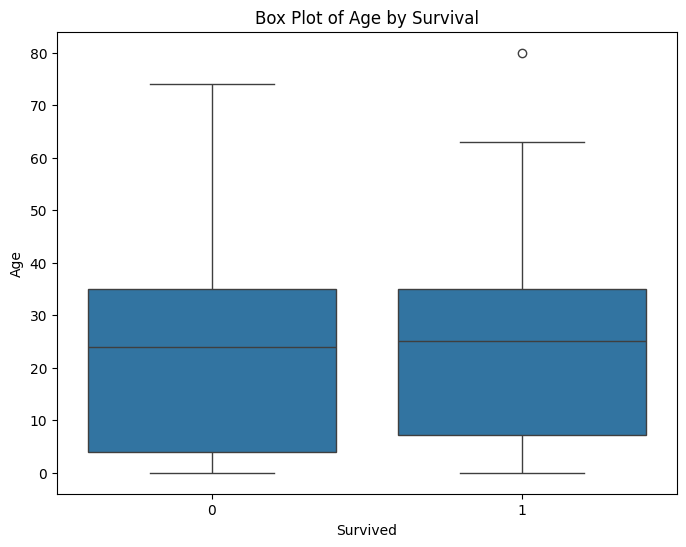

In [72]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=titanic_clean_dt)
plt.title('Box Plot of Age by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

C:\Users\broni\AppData\Local\Temp\ipykernel_15492\2752717815.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(titanic_clean_dt[titanic_clean_dt['Survived'] == 1]['Age'], label='Survived', shade=True)
C:\Users\broni\AppData\Local\Temp\ipykernel_15492\2752717815.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(titanic_clean_dt[titanic_clean_dt['Survived'] == 0]['Age'], label='Did Not Survive', shade=True)


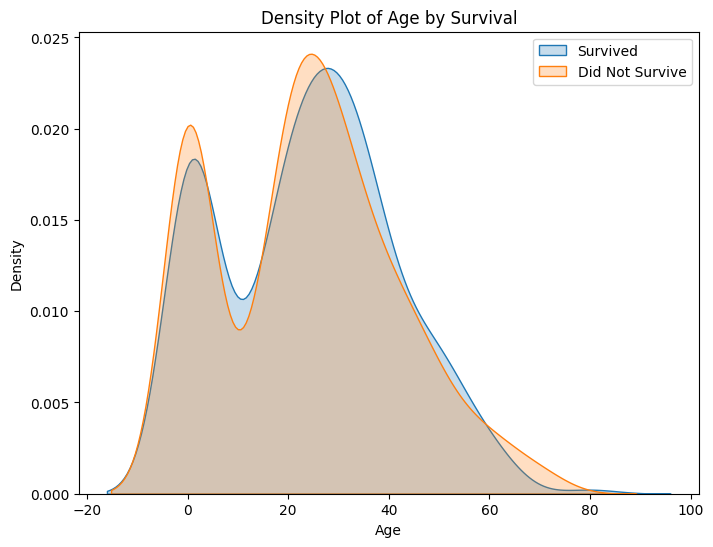

In [73]:
# Generate the density plot for Age by Survival
plt.figure(figsize=(8, 6))
sns.kdeplot(titanic_clean_dt[titanic_clean_dt['Survived'] == 1]['Age'], label='Survived', shade=True)
sns.kdeplot(titanic_clean_dt[titanic_clean_dt['Survived'] == 0]['Age'], label='Did Not Survive', shade=True)
plt.title('Density Plot of Age by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

C:\Users\broni\AppData\Local\Temp\ipykernel_15492\1572170143.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = titanic_clean_dt.groupby('AgeGroup')['Survived'].mean().reset_index()


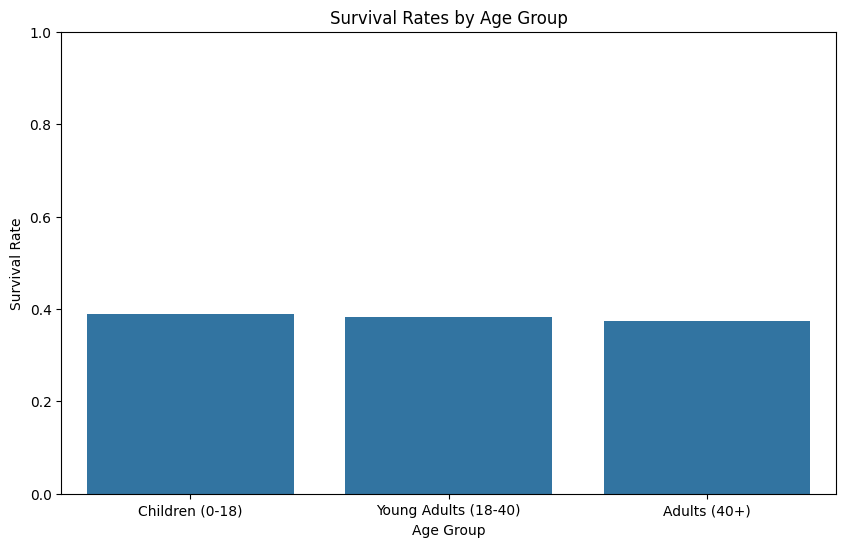

In [78]:
# Define age groups
bins = [0, 18, 40, max(titanic_clean_dt['Age'])+1]
labels = ['Children (0-18)', 'Young Adults (18-40)', 'Adults (40+)']
titanic_clean_dt['AgeGroup'] = pd.cut(titanic_clean_dt['Age'], bins=bins, labels=labels, right=False)

# Calculate survival rates by age group
survival_rates = titanic_clean_dt.groupby('AgeGroup')['Survived'].mean().reset_index()

# Create a bar plot for survival rates by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', data=survival_rates)
plt.title('Survival Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)  # Set y-axis to show proportions from 0 to 1
plt.show()

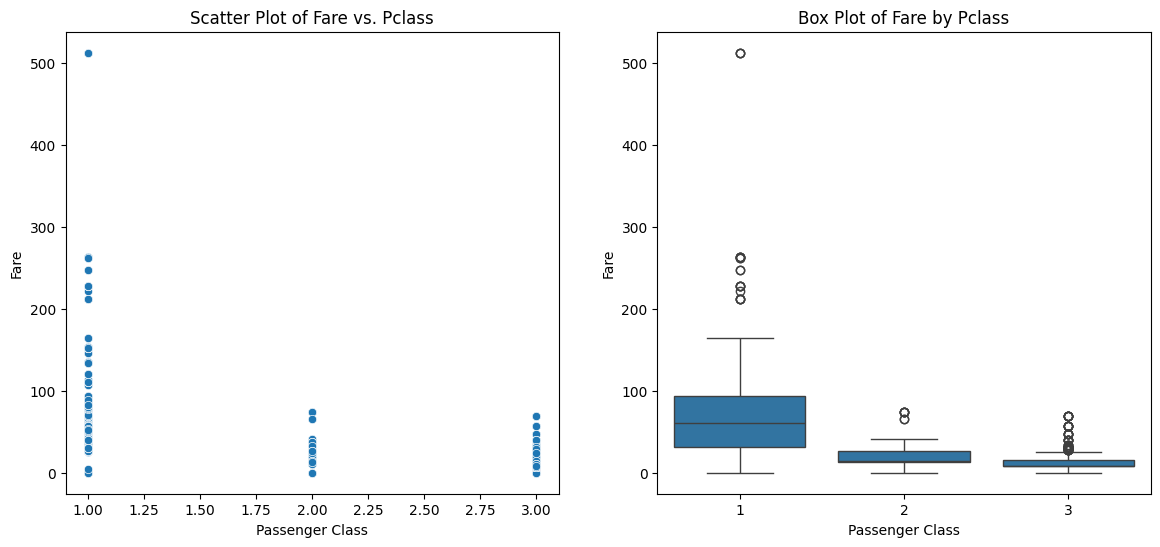

        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500


In [74]:
# Scatter Plot of Fare vs. Pclass
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Pclass', y='Fare', data=titanic_clean_dt)
plt.title('Scatter Plot of Fare vs. Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')

# Box Plot of Fare by Pclass
plt.subplot(1, 2, 2)
sns.boxplot(x='Pclass', y='Fare', data=titanic_clean_dt)
plt.title('Box Plot of Fare by Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

# Calculate grouped statistics for 'Fare' by 'Pclass'
grouped_fare_stats = titanic_clean_dt.groupby('Pclass')['Fare'].describe()
print(grouped_fare_stats)

Additional findings are that the survilval based on the age was higher the younger the group but suprisingly not that high as expected.

Also that the First class ticket was 3x more expensive then second class.